<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W4_Independent_Project_2021_09_Faith_Rotich_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task : To understand electric car usage by solving for another research question. Working as a Data Scientist for the Autolib electric car-sharing service company, the goal is to investigate a claim about the blue cars from the provided Autolib dataset.


Areas of Interest; 
 
- Weekends VS Weekdays

- Postal Codes 75015 vs 75017

- Area X vs Area Y 
                      

To work on this project, we will perform the following analysis with Python; 

Additional Tasks; 
- deal with outliers, anomalies, and missing data within the dataset

- Plot appropriate univariate and bivariate summaries recording our observations

- Implement the solution by performing hypothesis testing.

- Hypothesis Testing report. 


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
glossary = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")
glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Loading the Data from the source i.e. csv

# Dataset url = http://bit.ly/DSCoreAutolibDataset

# Viewing the dataset

autolib_df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


## Autolib Dataset

In [ ]:
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
autolib_df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
autolib_df.shape

(16085, 13)

# The dataset has 16,085 rows and 13 columns

In [ ]:
autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
autolib_df.info

<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [ ]:
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

### Cleaning the Dataset

In [ ]:
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


The table above summarises the mathematical values in the autolib dataset

In [ ]:
autolib_df.isnull().sum()


Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values in this dataset there

In [ ]:
autolib_df.dropna

<bound method DataFrame.dropna of        Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [ ]:
# checking for unique values using a for loop
for i in autolib_df.columns:
 print(autolib_df[i].unique())
 print ("\n")

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2

There are no missing values in this dataset

In [ ]:
autolib_df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Outliers 

Q1 = autolib_df.BlueCars_taken_sum.quantile(0.25)
Q3 = autolib_df.BlueCars_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.BlueCars_taken_sum < Q1 - 1.5 * IQR) | (autolib_df.BlueCars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13870
True      2215
Name: BlueCars_taken_sum, dtype: int64

There are 2215 outliers for the Bluecars taken, however, they are valid entries and shouldn't be dropped

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


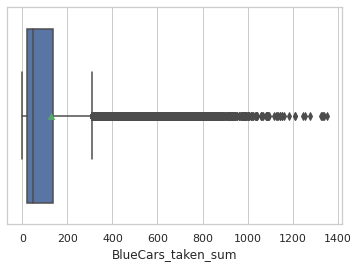

In [ ]:
#Boxplot
sns.boxplot(autolib_df['BlueCars_taken_sum'],showmeans = True)

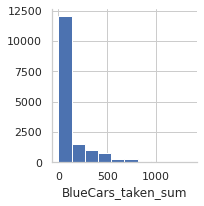

In [ ]:
#Plot histogram showing distribution of the BlueCars taken 
sns.set(style='whitegrid', color_codes=True)
bt_hist = sns.FacetGrid(autolib_df)
bt_hist.map(plt.hist, 'BlueCars_taken_sum', bins=10)

In [ ]:
Q1 = autolib_df.BlueCars_returned_sum.quantile(0.25)
Q3 = autolib_df.BlueCars_returned_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.BlueCars_returned_sum < Q1 - 1.5 * IQR) | (autolib_df.BlueCars_returned_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13872
True      2213
Name: BlueCars_returned_sum, dtype: int64

There are 2213 outliers for the Bluecars returned, which is very close to the outliers for Bluecars taken as shown above. These too are valid entries and shouldn't be dropped

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


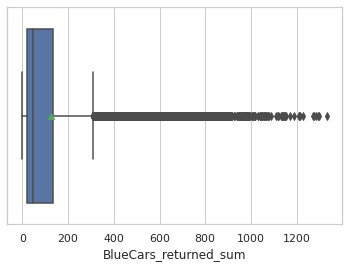

In [ ]:
#Boxplot
sns.boxplot(autolib_df['BlueCars_returned_sum'],showmeans = True)

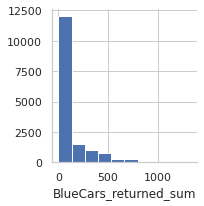

In [ ]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='whitegrid', color_codes=True)
bt_hist = sns.FacetGrid(autolib_df)
bt_hist.map(plt.hist, 'BlueCars_returned_sum', bins=10)

All the entries are valid and the outliers for the BlueCars column will be retained

## Univariate Analysis

Mean, Mode, Median, Std, Skewness Kurtosis

In [ ]:
print("Blue cars Returned")
print("The Mean: ",autolib_df.BlueCars_taken_sum.mean())
print("The Mode: ",autolib_df.BlueCars_taken_sum.mode())
print("The Median: ",autolib_df.BlueCars_taken_sum.median())
print("The Standard Deviation: ",autolib_df.BlueCars_taken_sum.std())
print("The Variance: ",autolib_df.BlueCars_taken_sum.var())
print("The Kurtosis: ",autolib_df.BlueCars_taken_sum.kurt())
print("The Skewness: ",autolib_df.BlueCars_taken_sum.skew())

Blue cars Returned
The Mean:  125.92695057506994
The Mode:  0    12
dtype: int64
The Median:  46.0
The Standard Deviation:  185.42657876727893
The Variance:  34383.01611333789
The Kurtosis:  6.172692305510042
The Skewness:  2.4063548974959086


In [ ]:
print("Blue cars Returned")
print("The Mean: ",autolib_df.BlueCars_returned_sum.mean())
print("The Mode: ",autolib_df.BlueCars_returned_sum.mode())
print("The Median: ",autolib_df.BlueCars_returned_sum.median())
print("The Standard Deviation: ",autolib_df.BlueCars_returned_sum.std())
print("The Variance: ",autolib_df.BlueCars_returned_sum.var())
print("The Kurtosis: ",autolib_df.BlueCars_returned_sum.kurt())
print("The Skewness: ",autolib_df.BlueCars_returned_sum.skew())

Blue cars Returned
The Mean:  125.912713708424
The Mode:  0    13
dtype: int64
The Median:  46.0
The Standard Deviation:  185.50153480148427
The Variance:  34410.819413706275
The Kurtosis:  6.1862880957582345
The Skewness:  2.412084978838923


The autolib dataset does not have a normal distribution since the kurtosis is >1 at a value of 6

It is also heavily skewed to the left as it is above +2

This is evident in the histograms plotted above

In [ ]:
autolib_df['date'].value_counts()

5/2/2018     104
6/10/2018    104
6/9/2018     104
5/3/2018     104
1/29/2018    104
            ... 
2/7/2018     102
2/15/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64

'Weekdays vs Weekends'

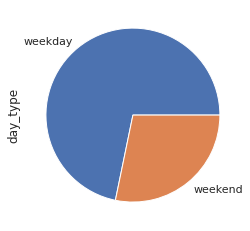

In [ ]:
autolib_df['day_type'].value_counts().plot(kind= 'pie')
# Chart Elements
('Weekdays vs Weekends')

As expected, days of the week has more value counts compared to the weekend

'Days of Week Distribution'

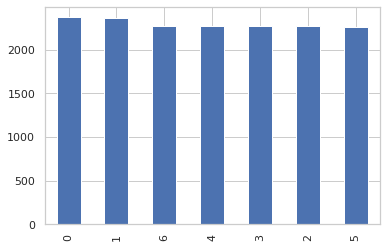

In [ ]:
autolib_df['dayOfWeek'].value_counts().plot(kind = 'bar')
  # Chart elements
('Days of Week Distribution')

Distribution between the days of the week is more or less the same

## Bivariate Analysis

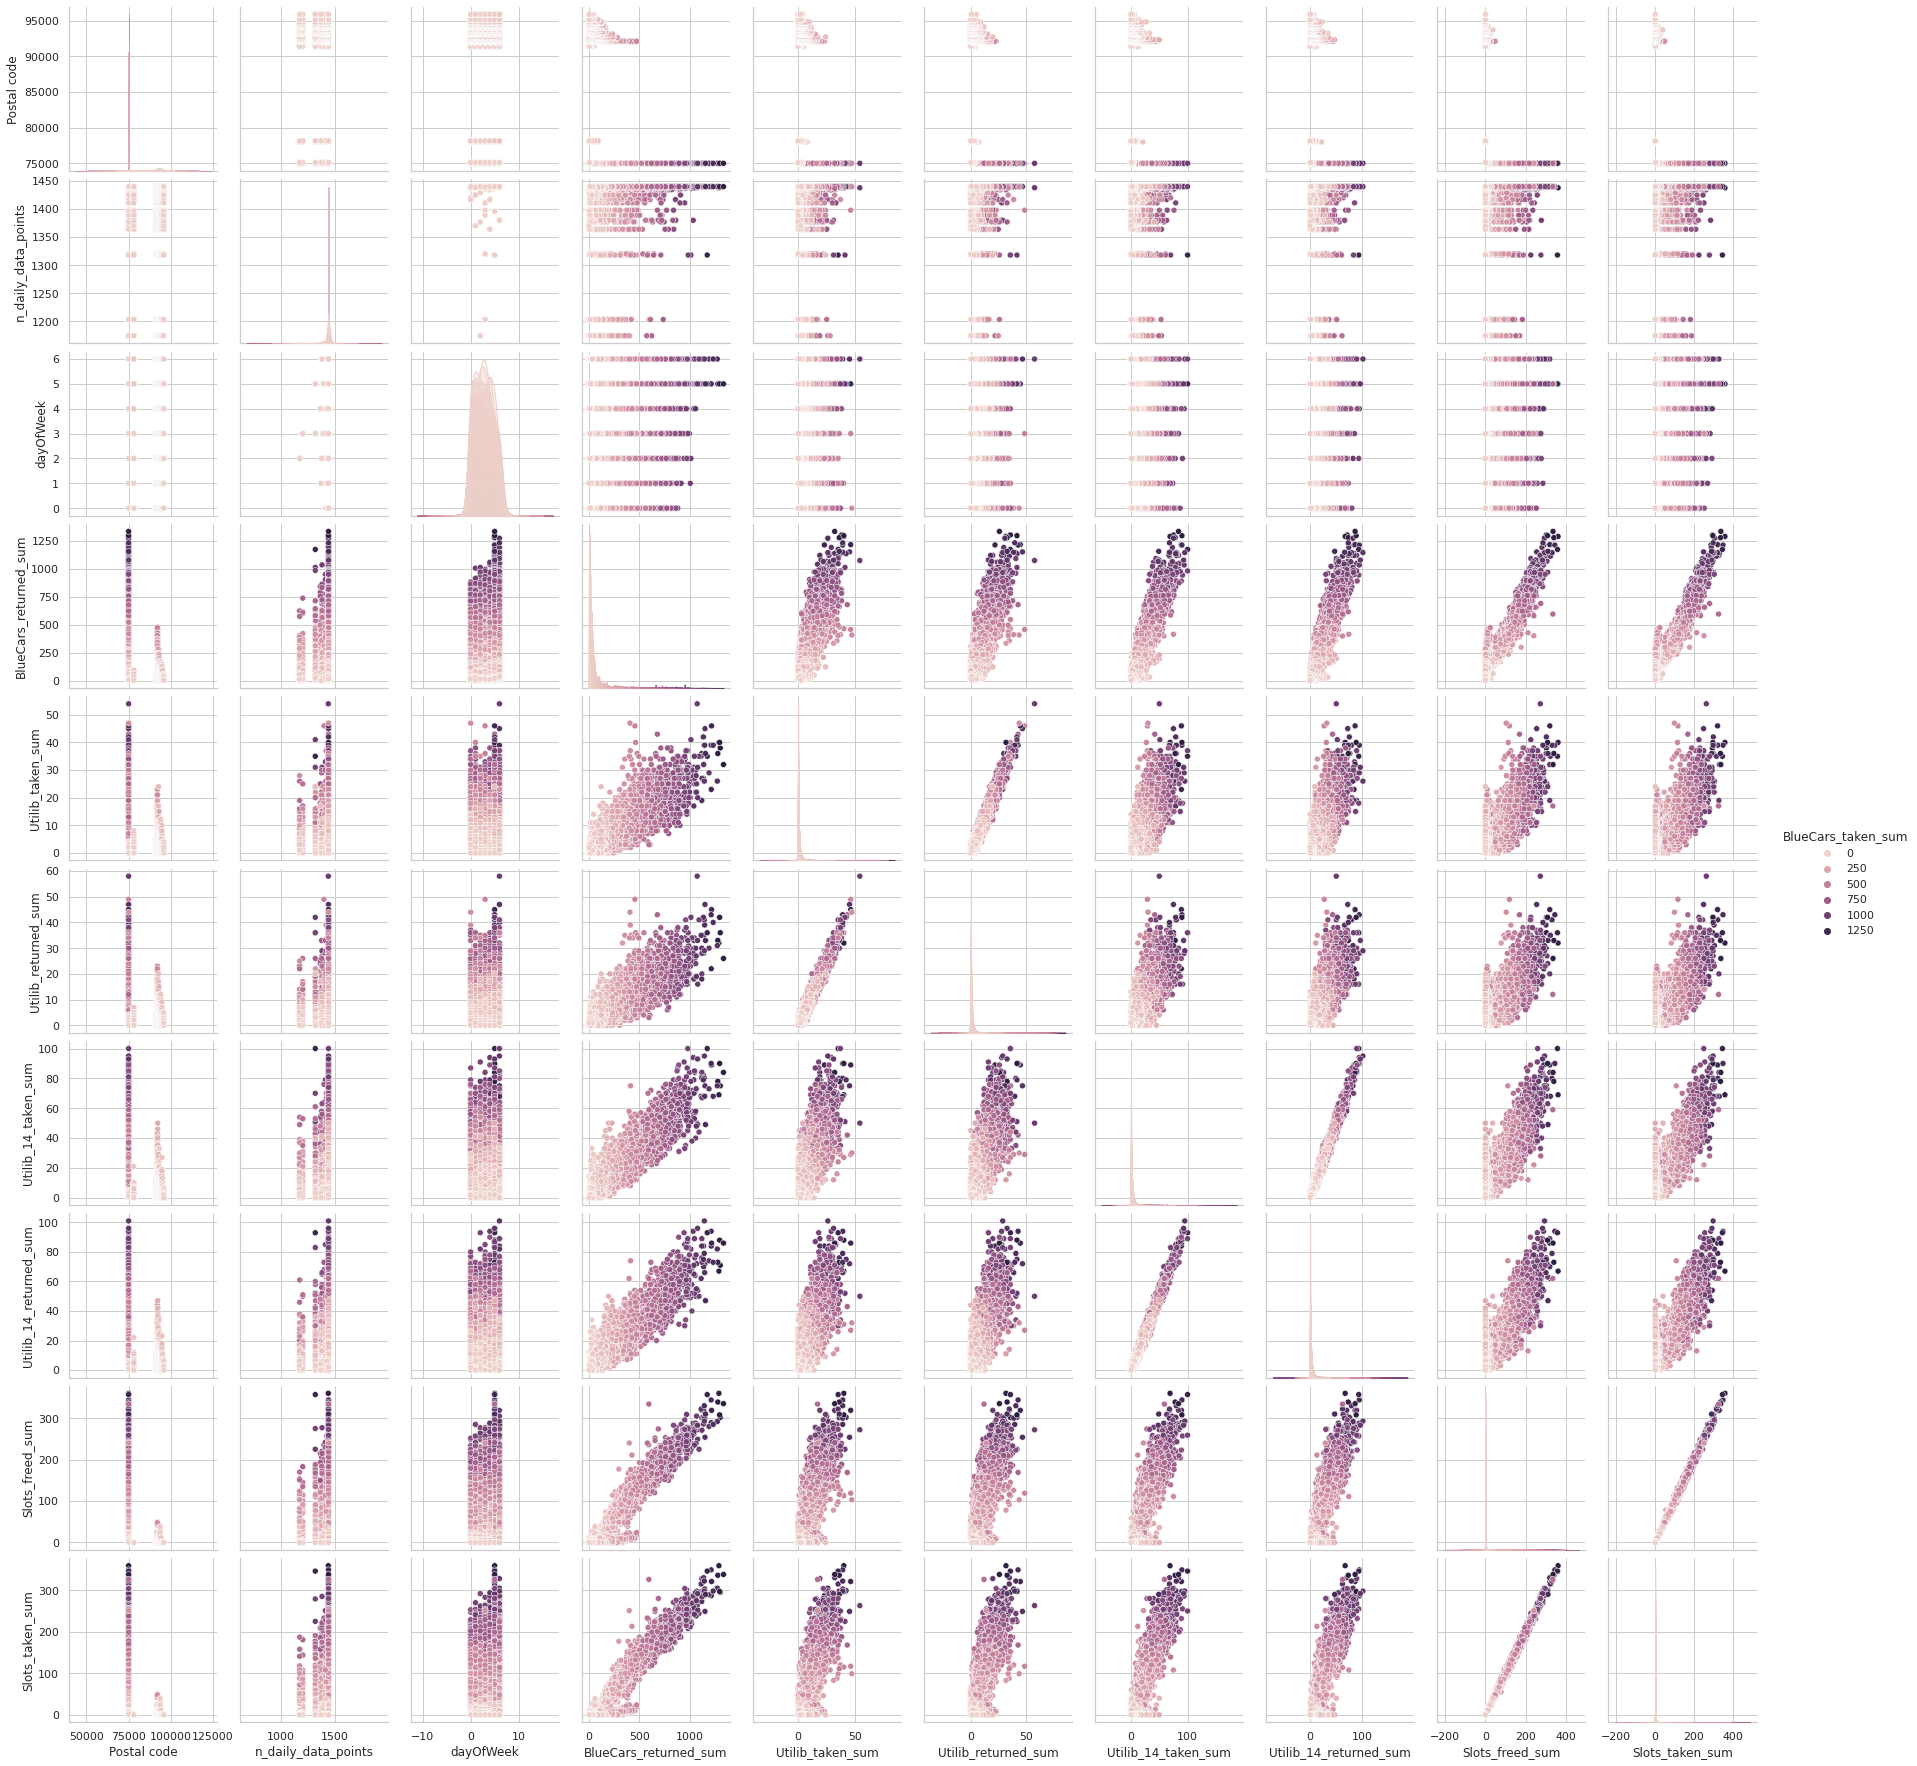

In [ ]:
sns.pairplot(autolib_df,hue = 'BlueCars_taken_sum')

A positive correlation can be observed with the Bluecars returned 

There is a contant relationship with the day of week/day_type

There is no negative relationship observed

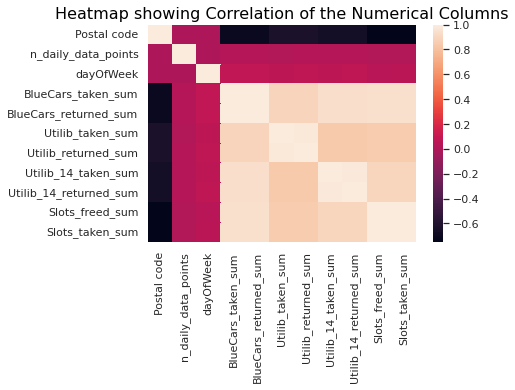

In [ ]:
# Heatmap

sns.heatmap(autolib_df.corr(),annot=False)
plt.title('Heatmap showing Correlation of the Numerical Columns', color = 'black', fontsize = 16)
plt.show()

## Sampling

Sampling Technique : Simple Random Sampling

Why? It will a representation of the Autolib bluecars target population without a sampling bias

Sampling Tool : Python Programming

I will also try the Stratified Random Sampling Technique



In [ ]:
#Selecting a sample from the autolib dataset using the Simple Random Sampling Technique
sample = autolib_df.sample(n=3000,replace='False')
print(sample)

       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
13337        94110   3/4/2018  ...                0                0
5391         92150   4/4/2018  ...                2                2
15301        94500  6/16/2018  ...                0                0
13536        94120  4/16/2018  ...                0                0
15967        95880   2/8/2018  ...                0                0
...            ...        ...  ...              ...              ...
15945        95880  1/17/2018  ...                0                0
3425         75116  6/13/2018  ...                5                6
13025        94000   3/3/2018  ...                0                0
14100        94160  2/12/2018  ...                0                0
4746         92110  3/13/2018  ...                0                0

[3000 rows x 13 columns]


## Hypothesis Testing 


Null Hypothesis: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays

H0 : μ1=μ2

Alternative Hypothesis: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays

H1: μ1≠μ2

Hypothesis testing (using a z-score)

Why Z-score? 
Our sample is greater than 30, we already know the population standard dev

A sample of 3000 values from each postal area has been used. 

Confidence Interval : 95% confidence level is used to test the hypothesis.

In [ ]:
autolib_df['BlueCars_taken_sum'].mean()

125.92695057506994

In [ ]:
autolib_df['BlueCars_returned_sum'].std()

185.50153480148427

In [ ]:
sample['BlueCars_taken_sum'].mean()

126.26366666666667

In [ ]:
sample['BlueCars_taken_sum'].std()

186.98715163930854

In [ ]:
sample.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:

df_h0 = sample[(sample['Postal code'] == 75015) & (sample.day_type == 'weekday')]
df_h0

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2319,75015,5/30/2018,1440,2,weekday,985,982,23,29,54,58,213,208
2279,75015,4/9/2018,1440,0,weekday,839,806,21,18,41,49,222,217
2208,75015,1/25/2018,1398,3,weekday,871,838,18,20,64,68,235,233
2265,75015,3/26/2018,1439,0,weekday,734,706,20,20,68,59,234,226
2184,75015,1/1/2018,1440,0,weekday,781,843,16,21,65,68,202,215
2229,75015,2/15/2018,1437,3,weekday,872,862,21,24,66,68,263,260
2241,75015,3/2/2018,1440,4,weekday,897,860,24,29,51,57,253,255
2185,75015,1/2/2018,1438,1,weekday,710,720,21,20,50,49,191,193
2208,75015,1/25/2018,1398,3,weekday,871,838,18,20,64,68,235,233
2260,75015,3/21/2018,1440,2,weekday,819,791,23,26,51,51,212,205


In [ ]:

df_h1 = sample[(sample['Postal code'] == 75017) & (sample.day_type == 'weekday')]
df_h1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2505,75017,1/10/2018,1440,2,weekday,682,677,17,17,31,29,174,167
2506,75017,1/11/2018,1440,3,weekday,713,714,12,11,32,35,154,156
2591,75017,4/9/2018,1440,0,weekday,710,684,20,17,43,39,195,185
2574,75017,3/23/2018,1440,4,weekday,742,735,34,33,65,66,205,207
2526,75017,1/31/2018,1440,2,weekday,731,702,15,13,54,54,200,191
2566,75017,3/15/2018,1440,3,weekday,642,674,18,20,51,56,206,206
2499,75017,1/4/2018,1320,3,weekday,553,534,16,17,30,30,141,145
2588,75017,4/6/2018,1364,4,weekday,766,754,25,25,36,37,193,186
2563,75017,3/12/2018,1440,0,weekday,664,633,17,20,31,31,186,182
2592,75017,4/10/2018,1440,1,weekday,724,692,19,19,37,41,188,188


In [ ]:
import math

In [ ]:

Mean_of_the_population = 125.92695057506994

Sample_size = 3000

Sample_mean = 126.26366666666667

Standard_deviation_of_the_population = 185.50153480148427


# Confidence interval = 0.05

z_score = (Sample_mean - Mean_of_the_population) / (Standard_deviation_of_the_population / math.sqrt(Sample_size))
z_score

# 2.52 
# 2.576 - 0.9950 Lower limit of right 0.5% tail

0.09942074012480231

In [ ]:
# confidence level = 95%
# alpha 0.05%
# H0 : Bluecars_taken_sum for 75015 = Blucars_taken_sum for 75017
# H1: Bluecars_taken_sum 75017 ≠ Bluecars_taken_sum 75017
# therefore this is a two-tailed test
# divide alpha by 2
# all the values in statistical tables for normal distribution or z-distribution are possible values for the p-value
# the p_value represents the area to the right of specific z scores
# z = 0.99
# from stats table, we get 2.52
# 2.52 > 0.99- falls in the rejection region


# p-value = 0.8389
# 0.05/2 = 0.025 - right-tailed test
# 0.8389 > 0.025 there we reject the null hypothesis 
# We reject the null hypothesis

We reject the null hypothesis
We accept the null hypothesis

There is enough evidence to reject the null hypothesis. The p-value falls in the rejection region

The number of Bluecars taken from postal code 75015 is the not equal to the number of bluecars taken from postal code 75017 during the weekdays

## Conclusion

We reject the null hypothesis We accept the null hypothesis

There is enough evidence to reject the null hypothesis. The p-value falls in the rejection region

The number of Bluecars taken from postal code 75015 is the not equal to the number of bluecars taken from postal code 75017 during the weekdays